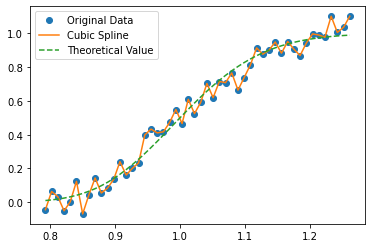

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Load the data from the csv file
data = pd.read_csv('data.csv')

# Get the x and y values
x = data['x'].values
y = data['y'].values
y_truth = data['ytruth'].values

# Calculate the 20th and 80th percentile of x
percentile_20 = np.percentile(x, 20)
percentile_80 = np.percentile(x, 80)

# Define the knots
knots = [percentile_20, percentile_80]

# Fit a cubic spline using truncated power basis functions
cs = CubicSpline(x, y, bc_type='not-a-knot', extrapolate=False)

# Plot the spline and the original data
plt.plot(x, y, 'o', label='Original Data')
plt.plot(x, cs(x), '-', label='Cubic Spline')
plt.plot(x, y_truth, '--', label='Theoretical Value')
plt.legend()
plt.show()

[-0.04428153  0.06355346  0.0325744 ]


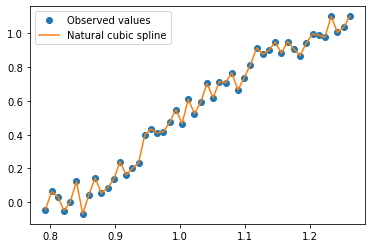

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Load data from csv file
data = pd.read_csv("data.csv")
x = data['x'].values
y = data['y'].values

# Calculate percentiles for internal knots
knots = np.percentile(x, [25, 50, 75])

# Fit natural cubic spline
spl = CubicSpline(x, y, bc_type='natural', extrapolate=False)

# Evaluate the spline for the first 3 observations
print(spl(x[:3]))

# Plot the results
plt.plot(x, y, 'o', label='Observed values')
plt.plot(x, spl(x), '-', label='Natural cubic spline')
plt.legend()
plt.show()

In [3]:
#!pip install --upgrade pip

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
from scipy.stats import norm, lognorm
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrix

In [5]:
cs_knots = np.quantile(x, [0.2,  0.8])    # can be n <> 3 knots here too, number of basis functions change

cs_basis = dmatrix('bs(x, knots = cs_knots, degree = 3, include_intercept = False)',
                   {'x': x}, return_type = 'dataframe')

cs_basis.head(3)

,Intercept,"bs(x, knots=cs_knots, degree=3, include_intercept=False)[0]","bs(x, knots=cs_knots, degree=3, include_intercept=False)[1]","bs(x, knots=cs_knots, degree=3, include_intercept=False)[2]","bs(x, knots=cs_knots, degree=3, include_intercept=False)[3]","bs(x, knots=cs_knots, degree=3, include_intercept=False)[4]"
0,1.0,0.000000,0.000000,0.000000,0.0,0.0
1,1.0,0.268471,0.007424,0.000053,0.0,0.0
2,1.0,0.467216,0.028156,0.000425,0.0,0.0


In [6]:
# estimation
m_linear = sm.OLS(y,cs_basis).fit()

In [7]:
# prediction and inference
m_linear_fit = m_linear.get_prediction(cs_basis).summary_frame()
type( m_linear_fit )
m_linear_fit.head(3)

pandas.core.frame.DataFrame

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.017630,0.042948,-0.068927,0.104187,-0.123506,0.158765
1,-0.000079,0.028748,-0.058017,0.057859,-0.125713,0.125555
2,-0.008705,0.021815,-0.052671,0.035260,-0.128539,0.111128


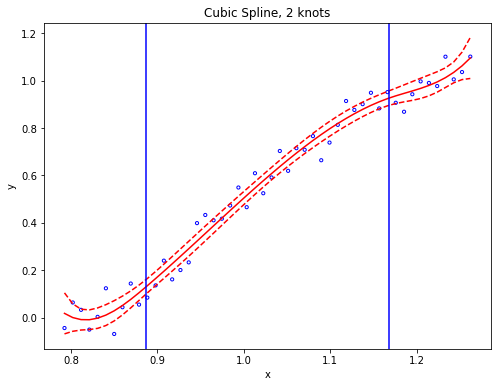

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, facecolors='none', edgecolors='b', s=10);
plt.plot(x, m_linear_fit["mean"], color = 'r');
plt.plot(x, m_linear_fit["mean_ci_lower"], color = 'r', linestyle = 'dashed');
plt.plot(x, m_linear_fit["mean_ci_upper"], color = 'r', linestyle = 'dashed');
plt.axvline(x = cs_knots[0], color = 'b');
plt.axvline(x = cs_knots[1], color = 'b');
plt.title("Cubic Spline, 2 knots");
plt.xlabel("x");
plt.ylabel("y");

In [9]:
cs_knots_b = np.quantile(x, [0, 0.25, 0.5, 0.75, 1])    # can be n <> 3 knots here too, number of basis functions change

cs_basis_b = dmatrix('bs(x, knots = cs_knots, degree = 3, include_intercept = False)',
                   {'x': x}, return_type = 'dataframe')

cs_basis_b.head(3)

,Intercept,"bs(x, knots=cs_knots, degree=3, include_intercept=False)[0]","bs(x, knots=cs_knots, degree=3, include_intercept=False)[1]","bs(x, knots=cs_knots, degree=3, include_intercept=False)[2]","bs(x, knots=cs_knots, degree=3, include_intercept=False)[3]","bs(x, knots=cs_knots, degree=3, include_intercept=False)[4]"
0,1.0,0.000000,0.000000,0.000000,0.0,0.0
1,1.0,0.268471,0.007424,0.000053,0.0,0.0
2,1.0,0.467216,0.028156,0.000425,0.0,0.0


In [10]:
c1 = cs_knots_b[0]
c2 = cs_knots_b[1]
c3 = cs_knots_b[2]
c4 = cs_knots_b[3]
c5 = cs_knots_b[4]

# create basis functions
d1 = (np.maximum(0, (x-c1)**3) - np.maximum(0, (x-c5)**3))/(c5-c1)
d2 = (np.maximum(0, (x-c2)**3) - np.maximum(0, (x-c5)**3))/(c5-c2)
d3 = (np.maximum(0, (x-c3)**3) - np.maximum(0, (x-c5)**3))/(c5-c3)
d4 = (np.maximum(0, (x-c4)**3) - np.maximum(0, (x-c5)**3))/(c5-c4)

bf1 = [1] * len(x)
bf2 = x
bf3 = d1 - d4
bf4 = d2 - d4
bf5 = d3 - d4

ncs_df = pd.DataFrame({'x0': bf1, 'x1': bf2, 'x2': bf3, 'x3': bf4, 'x4': bf5})
ncs_df.head(3)

,x0,x1,x2,x3,x4
0,1,0.792443,0.000000,0.0,0.0
1,1,0.802024,0.000002,0.0,0.0
2,1,0.811605,0.000015,0.0,0.0


In [11]:
# estimation
m_linear_b = sm.OLS(y,ncs_df).fit()

# prediction and inference
m_linear_fit_b = m_linear_b.get_prediction(ncs_df).summary_frame()
type( m_linear_fit_b )
m_linear_fit_b.head(3)

pandas.core.frame.DataFrame

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-0.028200,0.029615,-0.087848,0.031449,-0.155083,0.098683
1,-0.016021,0.025864,-0.068113,0.036071,-0.139532,0.107490
2,-0.003628,0.022423,-0.048789,0.041533,-0.124379,0.117123


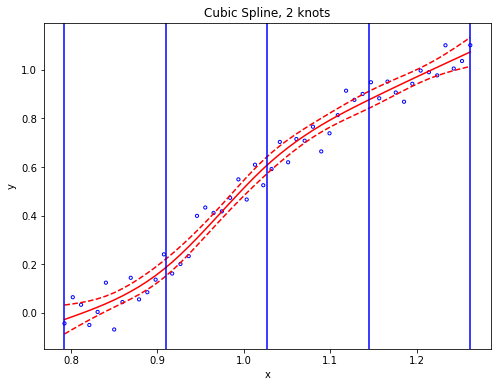

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, facecolors='none', edgecolors='b', s=10);
plt.plot(x, m_linear_fit_b["mean"], color = 'r');
plt.plot(x, m_linear_fit_b["mean_ci_lower"], color = 'r', linestyle = 'dashed');
plt.plot(x, m_linear_fit_b["mean_ci_upper"], color = 'r', linestyle = 'dashed');
plt.axvline(x = cs_knots_b[0], color = 'b');
plt.axvline(x = cs_knots_b[1], color = 'b');
plt.axvline(x = cs_knots_b[2], color = 'b');
plt.axvline(x = cs_knots_b[3], color = 'b');
plt.axvline(x = cs_knots_b[4], color = 'b');
plt.title("Cubic Spline, 2 knots");
plt.xlabel("x");
plt.ylabel("y");

In [13]:
!pip install rpy2

In [14]:
import rpy2.robjects as ro
from rpy2.robjects.packages import importr


r_base = importr('base')
r_stats = importr('stats')
r_splines = importr('splines')

In [15]:
r_ncs_knots = np.quantile(x, [0.25, 0.5, 0.75])
r_x = ro.FloatVector(x)
r_ncs_knots = ro.FloatVector(r_ncs_knots)
r_ncs_basis = r_splines.ns(r_x, knots = r_ncs_knots, intercept = True)
#print(r_base.attr(r_ncs_basis, 'knots'))  # same knots as input

r_ncs_df = pd.DataFrame(np.array(r_ncs_basis))
r_ncs_df.head(3)

,0,1,2,3,4
0,-0.267261,0.000000,-0.214286,0.642857,-0.428571
1,-0.167808,0.000091,-0.199852,0.599557,-0.399705
2,-0.069538,0.000725,-0.185495,0.556485,-0.370990


In [17]:
# estimation
r_ncs_linear = sm.OLS(list(y), r_ncs_df).fit()

# prediction and inference
r_ncs_linear_fit = r_ncs_linear.get_prediction(r_ncs_df).summary_frame()
r_ncs_linear_fit.head(3)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-0.028200,0.029615,-0.087848,0.031449,-0.155083,0.098683
1,-0.016021,0.025864,-0.068113,0.036071,-0.139532,0.107490
2,-0.003628,0.022423,-0.048789,0.041533,-0.124379,0.117123


In [18]:
# estimation
r_ncs_linear = sm.OLS(list(y), r_ncs_df).fit()

# prediction and inference
r_ncs_linear_fit = r_ncs_linear.get_prediction(r_ncs_df).summary_frame()
r_ncs_linear_fit.head(3)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-0.028200,0.029615,-0.087848,0.031449,-0.155083,0.098683
1,-0.016021,0.025864,-0.068113,0.036071,-0.139532,0.107490
2,-0.003628,0.022423,-0.048789,0.041533,-0.124379,0.117123


In [21]:
#get the middle line
r_x = ro.FloatVector(x)
r_y = ro.FloatVector(y)

kwargs = {'x':r_x, 'y':r_y}
r_smooth_spline_mid = ro.r['smooth.spline'](**kwargs)
r_ss_pred_mid = np.array(ro.r['predict'](r_smooth_spline_mid, r_x).rx2('y'))

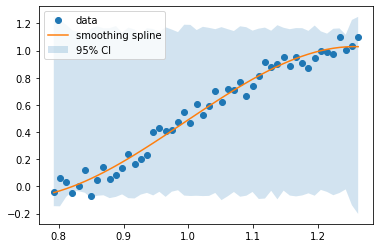

In [22]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from sklearn.utils import resample
import matplotlib.pyplot as plt

# define the data
#x = np.array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5])
#y = np.array([-2.2, -1.0,  0.6,  2.2,  3.7,  4.5,  4.7,  4.3,  3.2,  1.4, -0.8])

# fit a smoothing spline
spline = UnivariateSpline(x, y, s=1)

# generate bootstrap samples
n_bootstraps = 1000
bootstrapped_means = []
for i in range(n_bootstraps):
    bootstrap_sample = resample(y, replace=True, n_samples=len(y))
    bootstrap_spline = UnivariateSpline(x, bootstrap_sample, s=1)
    bootstrapped_means.append(bootstrap_spline(x))

# calculate confidence intervals
bootstrapped_means = np.array(bootstrapped_means)
mean = np.mean(bootstrapped_means, axis=0)
std = np.std(bootstrapped_means, axis=0)
lower_ci = mean - 1.96 * std
upper_ci = mean + 1.96 * std

# plot the results
plt.plot(x, y, 'o', label='data')
plt.plot(x, spline(x), label='smoothing spline')
plt.fill_between(x, lower_ci, upper_ci, alpha=0.2, label='95% CI')
plt.legend()
plt.show()

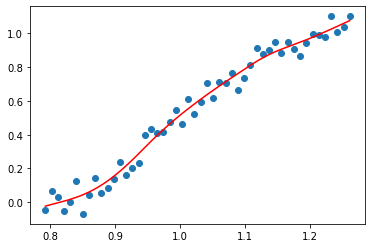

In [23]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

# import the required R packages
base = importr('base')
utils = importr('utils')
stats = importr('stats')

# create R vectors for the data
x_r = robjects.FloatVector(x)
y_r = robjects.FloatVector(y)

# fit a smoothing spline to the data
spline_fit = stats.smooth_spline(x_r, y_r)

# evaluate the spline on a finer grid of x values
x_grid_r = robjects.FloatVector(np.linspace(min(x), max(x), num=500))
y_grid_r = stats.predict_smooth_spline(spline_fit, x_grid_r)

# convert the R vectors back to numpy arrays
x_grid = np.array(x_grid_r)
y_grid = np.array(y_grid_r)

# plot the data and spline
plt.scatter(x, y)
plt.plot(x_grid, y_grid[1], color='red')
plt.show()


In [24]:
import numpy as np
from rpy2 import robjects as ro
from rpy2.robjects import numpy2ri
import matplotlib.pyplot as plt

# Convert numpy arrays to R objects
numpy2ri.activate()
x_r = ro.FloatVector(x)
y_r = ro.FloatVector(y)

# Fit a smoothing spline to the data
smooth_spline = ro.r['smooth.spline']
fit = smooth_spline(x_r, y_r, spar=0.5)

# Generate bootstrap samples
num_bootstraps = 1000
bootstrap_indices = np.random.choice(len(x), size=(num_bootstraps, len(x)), replace=True)

# Evaluate spline at bootstrap samples
bootstrap_fits = []
for indices in bootstrap_indices:
    x_boot = x[indices]
    y_boot = y[indices]
    x_boot_r = ro.FloatVector(x_boot)
    y_boot_r = ro.FloatVector(y_boot)
    fit_boot = smooth_spline(x_boot_r, y_boot_r, spar=0.5)
    bootstrap_fits.append(fit_boot.rx2('y'))

# Calculate 95% confidence intervals
lower_ci = np.percentile(bootstrap_fits, 2.5, axis=0)
upper_ci = np.percentile(bootstrap_fits, 97.5, axis=0)

# Plot the data and smoothed curve with confidence intervals
plt.scatter(x, y, color='black', alpha=0.5)
plt.plot(x, fit.rx2('y'), color='blue', label='Smoothed curve')
plt.fill_between(x, lower_ci, upper_ci, color='gray', alpha=0.5, label='95% CI')
plt.legend()
plt.show()


/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3539: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.asanyarray(a)


ValueError: operands could not be broadcast together with shapes (32,) (28,) 